#Imported necessary lib for data analysis.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [23]:
df = pd.read_csv("/content/mymoviedb.csv",lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [25]:
df.isna().sum()

,0
Release_Date,0
Title,0
Overview,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0
Poster_Url,0


In [26]:
df.isnull().sum()

,0
Release_Date,0
Title,0
Overview,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0
Poster_Url,0


In [27]:
df.duplicated().sum()

np.int64(0)

Exploration Summary

In [28]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


1. Dataset Size
There are 9,827 movies (or entries).

2. Popularity
Average popularity: ~40, but

Standard deviation: ~109 → very high variability (some movies are extremely more popular than the rest).

Median (50%): ~21 → Most movies are much less popular than the mean (suggesting a right-skewed distribution with a few very high-popularity outliers).

Min: ~13, Max: ~5083 → Some movies are massively more popular than typical ones.

✅ Conclusion: Popularity is heavily skewed, with a few movies dominating.

3. Vote Count
Average vote count: ~1393,

Std dev: ~2611 → again, huge spread.

Median: 444 votes → Half the movies have fewer than ~444 votes.

Max: 31,077 votes → some movies are widely rated.

Min: 0 votes → there are movies with no ratings at all.

✅ Conclusion: A small fraction of movies have massive vote counts, while many have very few.

4. Vote Average (Rating)
Average rating: ~6.44,

Std dev: ~1.13 → ratings are relatively tightly clustered around the mean.

Median: 6.5 → fairly balanced distribution.

25%-75% range: 5.9 to 7.1 → most movies are rated between 6 and 7.

Min: 0, Max: 10 → includes unrated or extreme ratings.

✅ Conclusion: Most movies are rated around 6–7, suggesting a slight bias toward average-positive ratings.

Overall Insights
Popularity & vote count are highly skewed, meaning a few blockbuster movies dominate in attention.

Ratings (vote average) are more balanced, with most movies hovering around a “decent” score of ~6.5.

There are movies with no votes despite having a popularity value.

In [29]:
import pandas as pd

df_exploded = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')
highest_rated_by_genre = df_exploded.loc[
    df_exploded.groupby('Genre')['Vote_Average'].idxmax()
]

result = highest_rated_by_genre[['Genre', 'Title', 'Vote_Average', 'Vote_Count', 'Popularity']]
result = result.sort_values(by='Genre')
print(result)


                Genre                                          Title  \
9391           Action                     Kung Fu Master Huo Yuanjia   
310            Action         Evangelion: 3.0+1.0 Thrice Upon a Time   
221            Action                                The Dark Knight   
9391           Action                     Kung Fu Master Huo Yuanjia   
667            Action  Demon Slayer: Kimetsu no Yaiba Sibling's Bond   
667            Action  Demon Slayer: Kimetsu no Yaiba Sibling's Bond   
4932           Action                                    Green Snake   
4932        Adventure                                    Green Snake   
310         Animation         Evangelion: 3.0+1.0 Thrice Upon a Time   
6199        Animation        Scooby-Doo! Adventures: The Mystery Map   
4932        Animation                                    Green Snake   
667         Animation  Demon Slayer: Kimetsu no Yaiba Sibling's Bond   
1897        Animation                     Steven Universe: The M

#Highest Rated Movie in Each Genre

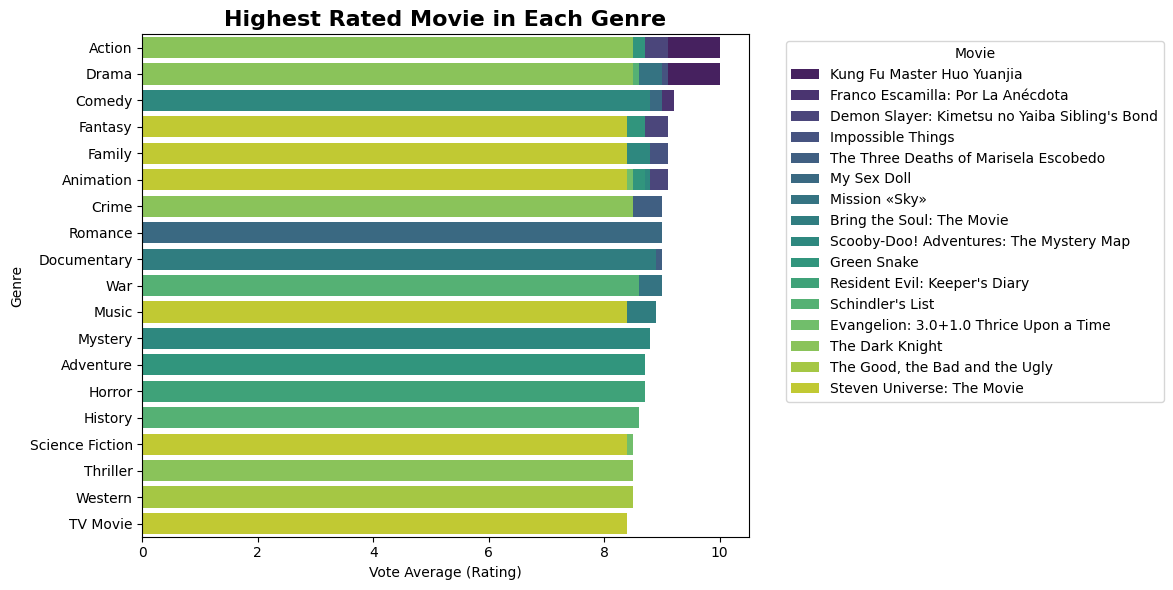

In [31]:
highest_rated_by_genre = df_exploded.loc[
    df_exploded.groupby('Genre')['Vote_Average'].idxmax()
]
highest_rated_by_genre = highest_rated_by_genre.sort_values(by='Vote_Average', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Vote_Average',
    y='Genre',
    data=highest_rated_by_genre,
    hue='Title',
    dodge=False,
    palette='viridis'
)

plt.title("Highest Rated Movie in Each Genre", fontsize=16, weight='bold')
plt.xlabel("Vote Average (Rating)")
plt.ylabel("Genre")
plt.legend(title="Movie", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The visualization shows that the highest-rated movies across all genres score very high, mostly between 8 and 10. Action and Drama lead with near-perfect ratings, while Animation, Family, and Fantasy also feature beloved titles. Classics like *Schindler’s List* dominate History and Documentary genres. Even niche genres like Western and TV Movie have highly acclaimed top films. Overall, every genre has at least one standout movie that is widely loved by audiences.


#Genres with the Highest Average Movie Ratings

/tmp/ipython-input-32-6768928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


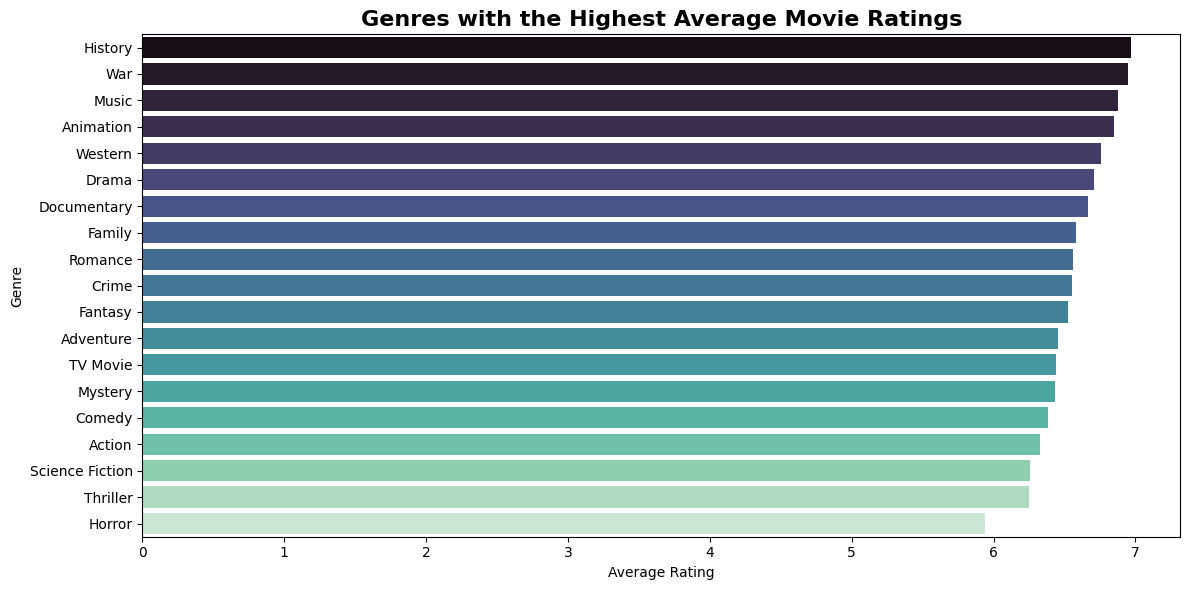

In [32]:
avg_rating_per_genre = df_exploded.groupby('Genre')['Vote_Average'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(
    x='Vote_Average',
    y='Genre',
    data=avg_rating_per_genre,
    palette='mako'
)

plt.title("Genres with the Highest Average Movie Ratings", fontsize=16, weight='bold')
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

The visualization shows that **History, War, and Music genres have the highest average movie ratings**, indicating they tend to receive stronger critical appreciation. **Animation, Western, and Drama** also rank high, suggesting consistent quality in these genres. In contrast, **Horror, Thriller, and Science Fiction** have comparatively lower average ratings, likely due to mixed audience reception. Overall, more serious or niche genres tend to achieve higher ratings than mainstream commercial ones like Action or Comedy.


#Popularity vs Rating

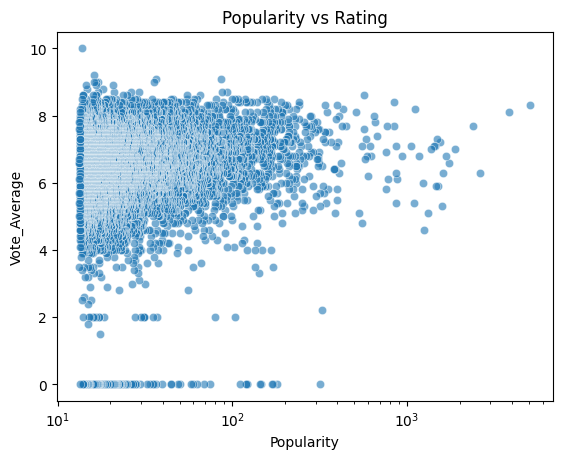

In [33]:
sns.scatterplot(data=df, x='Popularity', y='Vote_Average', alpha=0.6)
plt.xscale('log')  # log scale since popularity can be very skewed
plt.title("Popularity vs Rating")
plt.show()


This scatter plot shows that while some popular movies don’t have very high ratings, most highly popular movies tend to also have good ratings.

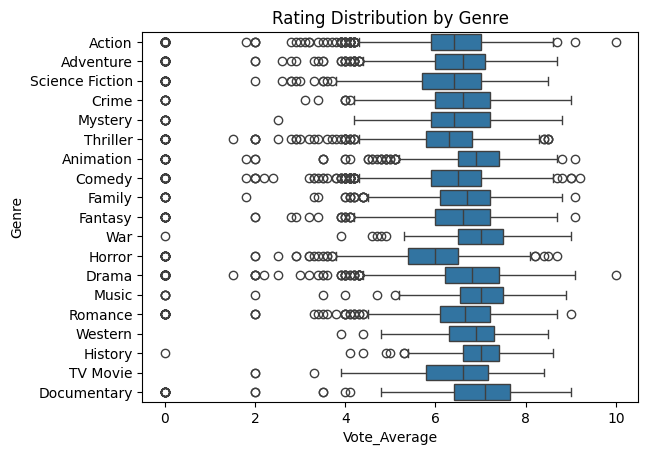

In [34]:
df_exploded = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')
sns.boxplot(data=df_exploded, x='Vote_Average', y='Genre')
plt.title("Rating Distribution by Genre")
plt.show()

1) The graph shows the distribution of movie ratings (vote average) across various genres.

2) Most genres have a median rating between 6 and 7 out of 10, indicating generally positive reception.

3) Genres like Documentary, History, and TV Movie have higher median ratings compared to others.

4) Horror and War genres exhibit wider rating dispersion, suggesting more variation in audience opinions.

5) Several genres have noticeable outliers, especially at the lower and upper ends of the rating scale.

#Average Rating by Language

<Axes: title={'center': 'Average Rating by Language'}, ylabel='Original_Language'>

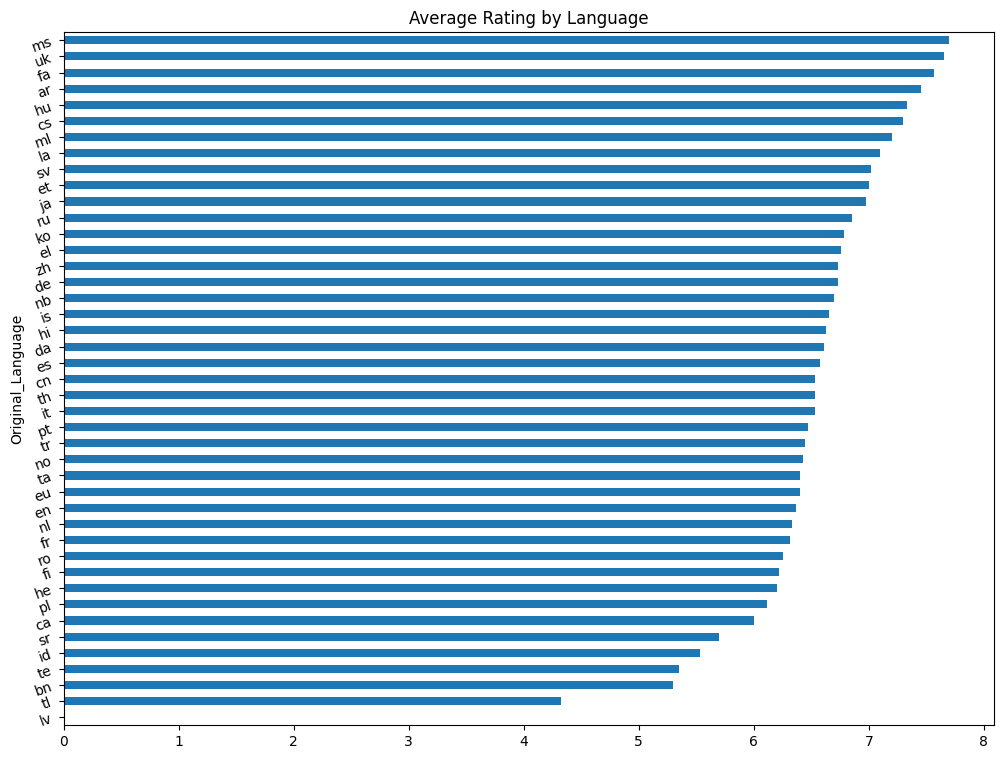

In [41]:
avg_rating_lang = df.groupby('Original_Language')['Vote_Average'].mean().sort_values()
avg_rating_lang.plot(kind='barh', figsize=(12,9),rot=20, title="Average Rating by Language")


#Average Rating by Release Year

Text(0.5, 1.0, 'Average Rating by Release Year')

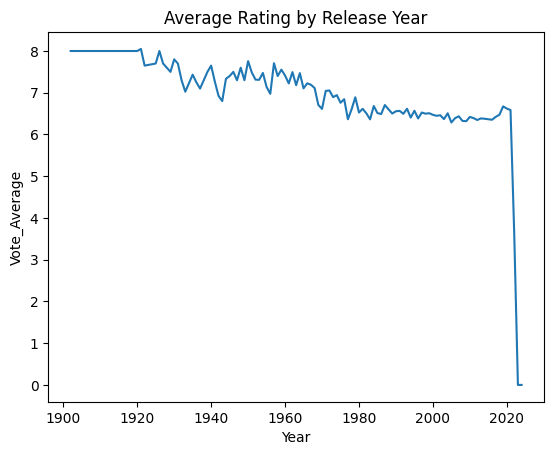

In [42]:
df['Year'] = pd.to_datetime(df['Release_Date']).dt.year
sns.lineplot(data=df.groupby('Year')['Vote_Average'].mean())
plt.title("Average Rating by Release Year")

Older movies generally have higher average ratings, likely because only well-regarded classics are remembered and rated. Over time, ratings show a gradual decline, reflecting a mix of more diverse releases and broader audience opinions. The sharp drop after 2020 is due to many recent movies having very few or no ratings yet, rather than an actual decline in quality.

#Average Popularity per Genre

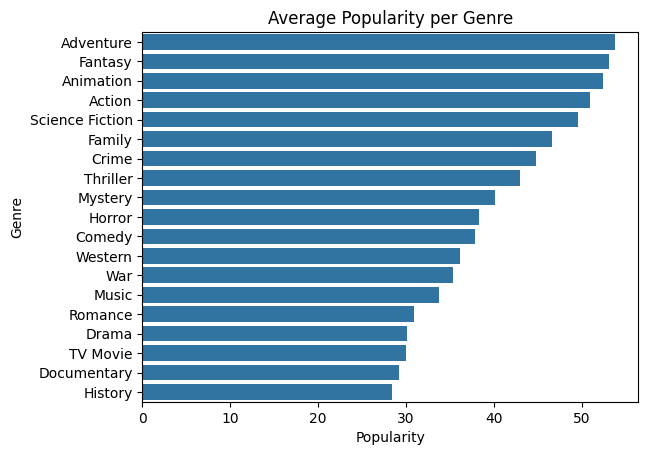

In [45]:
avg_popularity = df_exploded.groupby('Genre')['Popularity'].mean().sort_values(ascending=False)
sns.barplot(x=avg_popularity, y=avg_popularity.index)
plt.title("Average Popularity per Genre")
plt.show()

We can clearly see Adventure is a fan favorite, closely followed by Fantasy and Animation—likely boosted by the huge popularity of anime and animated films.

#Correlation Between Popularity, Vote Count & Rating

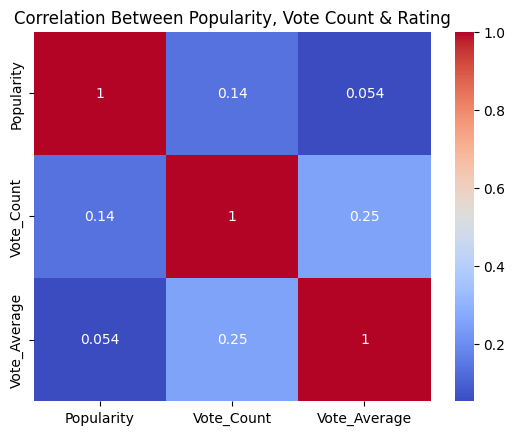

In [46]:
sns.heatmap(df[['Popularity','Vote_Count','Vote_Average']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Popularity, Vote Count & Rating")
plt.show()

This heatmap shows **very weak correlations** between popularity, vote count, and ratings. Popular movies aren’t necessarily highly rated, and having more votes doesn’t strongly guarantee better ratings—though there’s a slight trend that well-rated movies attract more votes.


#Most common words in title



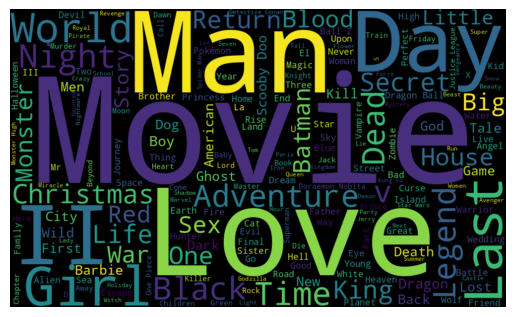

In [48]:
from wordcloud import WordCloud
text = " ".join(df['Title'].dropna())
wordcloud = WordCloud(width=1000, height=600, background_color='black').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Vote Count vs Rating

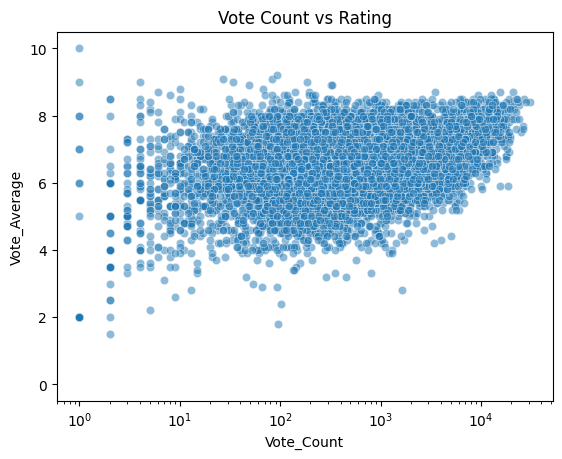

In [49]:
sns.scatterplot(x='Vote_Count', y='Vote_Average', data=df, alpha=0.5)
plt.xscale('log')
plt.title("Vote Count vs Rating")
plt.show()

#Rating Trends by Genre Over Time

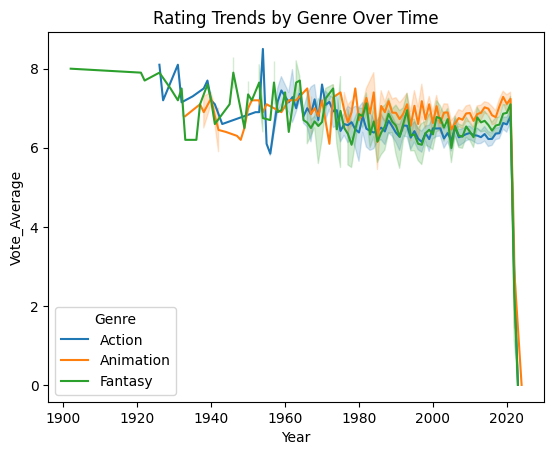

In [50]:
df_exploded = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')
df_exploded['Year'] = pd.to_datetime(df_exploded['Release_Date']).dt.year
sns.lineplot(data=df_exploded[df_exploded['Genre'].isin(['Action','Fantasy','Animation'])],
             x='Year', y='Vote_Average', hue='Genre')
plt.title("Rating Trends by Genre Over Time")
plt.show()

Ignoring the sharp drop at the end, we can see that Animation shows an upward trend in ratings after the 1970s, likely reflecting improvements in storytelling, technology, and the rise of anime and modern animated films.